In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from PIL import Image
from sklearn.utils import shuffle
from time import time

In [2]:
n_colors = [64, 32, 16, 8]
fantasy = Image.open("Image_for_lab.jpg")
fantasy = np.array(fantasy, dtype=np.float64) / 255

In [3]:
w, h, d = original_shape = tuple(fantasy.shape)
image_array = np.reshape(fantasy, (w * h, d))

In [4]:
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)

In [5]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


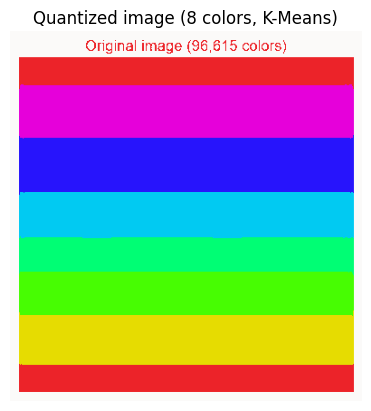

In [6]:
for i in n_colors:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(image_array)
    plt.figure(2)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({i} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

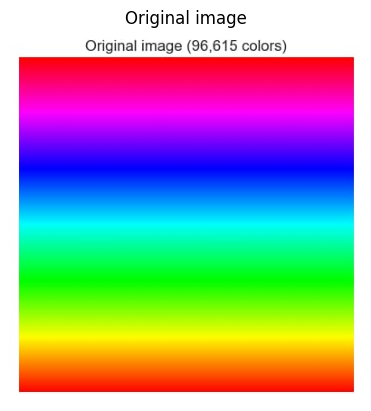

In [7]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(fantasy)